# Entity Normalization Engine
_A notebook with pre-production code for exploring potential approaches_

## Brainstrorming/notes/ideas/thoughts

It seems to me like there are two main directions to approaching this problem:
1. Raw text processing, withought taking into consideration entities, semantic information, morphology of strings, context, etc.. Create clusters right away. I could see this working to a certain extend, by projecting all of the strings' vector representations to a space and applying transformation after transormation with the hope that at some point, these transformations will capture the features that describe these groups. It certainly needs a lot of experimentation and could be very time consuming. We'll call this family of approaches __Team A__.
2. Text preprocessing, attempt to filter/predict the _type_ of each string depending on entity, context, morphology of sting, or any other information we can extract in order to classify the strings into one of the five categories (company names, company addresses, serial numbers, physical goods and locations), first, and then proceed with specific clustering tecniques that best fit each category respectively. We'll call this family of approaches __Team B__.

To put it in a nutshell, a big differentive factor of these two families of approaches, is the step of classification of a given string - whether it is a company name, company address, serial number, physical good or location. This is a whole system just by itself. I feel that if we could built such a system, pass each string through it, create the initial groups, and then apply clustering algorithms to each group seperately will give us better accuracy - this is just an intuition though.

### Potential Approaches
- Team A approaches - naive:
   * Naively treat all strings the same way, withought taking into consideration their entity or other information. Pick a clustering algorithm, a dinstance/similarity metric and create the clusters (experiment with various algorithms/metics combinations). 
   
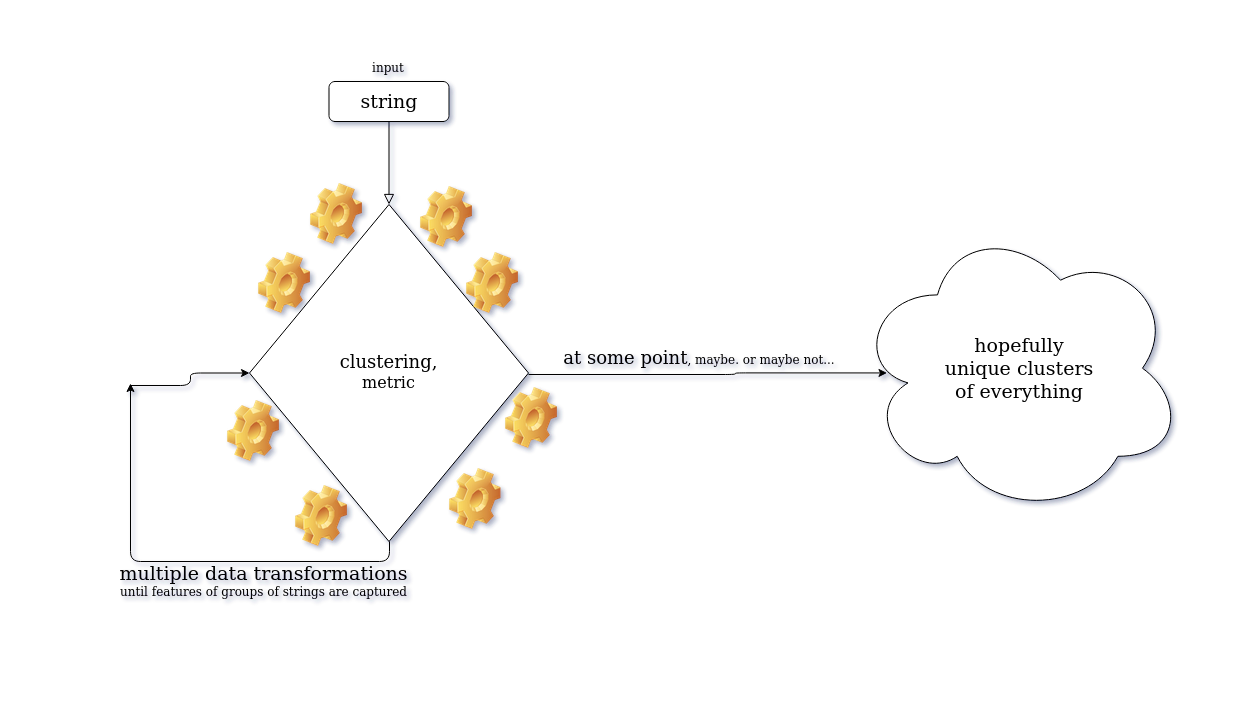

- Team B approaches - filtering system first:
   1. Feed every sample through a Named Entity Recognition (NER) model to detect the entity to which each string belongs to, create the initial groups and then apply a clustering algorithm/metric to each group. The issue here is that current NER systems can't deal with company addresses, serial numbers, and physical goods, since these are not _named entities_. Subsequently, strings than have not been classified as _named entities_ by the model, will proceed directly to the clusternig phase. 
   
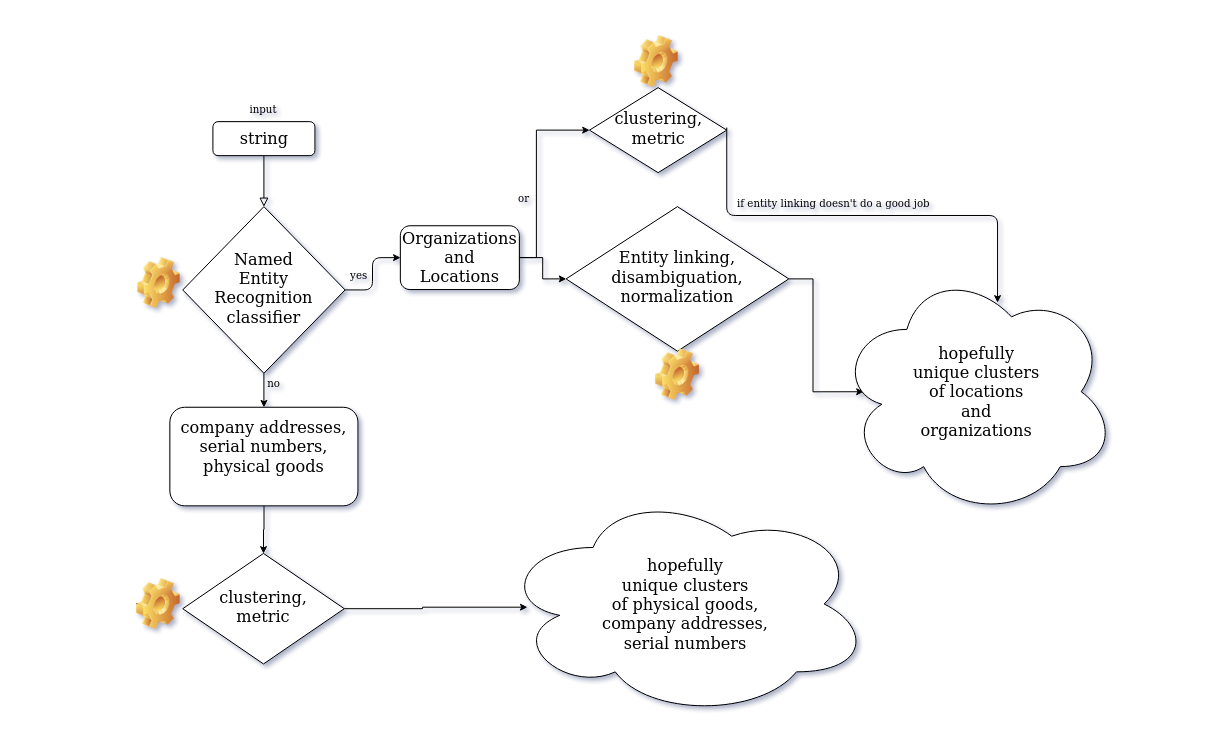

   2. Feed samples that have been classified as named entities from preveous step through a Named Entity Linking(NEL)/Disambiguation(NED)/Normalization(NEN) model ([there exist systems that can do both NER and Liniking](https://nlpprogress.com/english/entity_linking.html). This, at first glance, seem like a way to group together entities such: “Marks and Spencers Ltd”, “M&S Limited”. But, unfortunately, as far as I'm concerned, this requaries a Knowledge Base. Various models are trained on (have learned word embeddings) different KBs (eg. wikipedia, CoNLL). What happens if, for example, "M&S Limited" and similar strings does  not exist in that Knowlidge Base? This is an issue. However If this could work in real life, what we would expect to achieve is that company names and locations need not pass through a clustering procces. Hence, we are eliminating clustering inaccuracies a bit more.
   
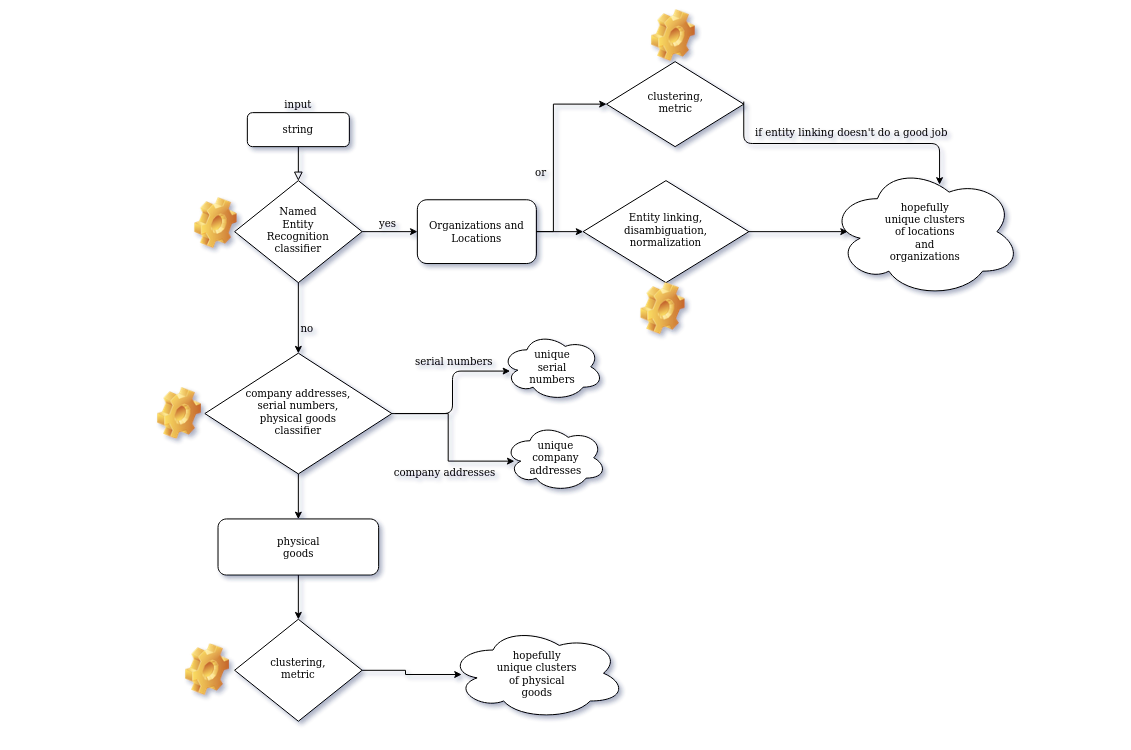

   3. See if we can find appropriate sources, scrap the web, and create datasets of addresses, serial numbers, and physical goods. Create a corpus, train a model (learn word embeddings with word2vec maybe?) that can classify a string into one of these three classes. We could even attempt to build a custom NER model to include our new datasets. Here, based on the assumption that serial numbers and company addresses are _unique_, then that leaves us only the physical goods which need to be passed through a clustering process, but since these are real world physical items, word2vec on wikipedia/genism could also work.

### Approaches - Summary

As a first step, I will attempt to built a Team B system, leveraging a NER pre-trained model to filter company names and locations, create a group for company names, one for locations, and one for everything else. Then proceed to the clustering phase, where clustering algorithms will be applied to these groups separately in an atempt to minimize clustering error.


### Clustering algorithms that don't require #clusters apriori
  - Affinity propagation(graph based, the end result is a set of cluster ‘exemplars’)
  - Hierarchical clustering
  - Agglomerative Clustering (complete linkage)
  - DBSCAN
  - try all of the above with their default cluster metric, try them with levenshtein distance where possible
  - a general issue is the vectorization step. Scikit-learn estimators assume you’ll feed them real-valued feature vectors. This assumption is hard-coded in pretty much all of the library. Custom metrics for strings are hard to incorporate into these algorithm (at leas for now, given my current understanding)

### Notes/constraints
* Graph clustering algorithms could be a good choice since we are dealing with sting distance/similarity matrices - similar to graph distance/similarity matrices
  * potential graph clustering algo candidates:
    * Markov Clustering
    * Restricted Neighbourhood Search Clustering 
    * Louvain Clustering
    * Affinity Propagation Clustering
* company adresses are unique     
* serial numbers are unique
* flair can deal with: organazations, locations, everything else is an _"unknown_soup"_, need to filter the org and loc
* samples appear incrementaly - no access to the full stream -> update cluster params per data point observation
* DBSCAN is good at identifying outliers - might be a good idea to use it on locations and company names in an attempt to detect misclassifications of flair's named entity recognition model. [a very cool viz of the algorithm](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) (choose pimpled smiley :P)
* for company names: ner + some sort of vectorization (word emb) or string similarity metric
* for goods: since they are real objects, word2vec on wikipedia could work
* for locations: ner + word2vec on wikipedia might work as well
* for serial numbers: some sort of defaul "nothing" since these are hypotheticaly unique
* for addresses: same as ser. nums
* clustering algos that can use string similarity metrics
* classic vectorization might not work (bag of words, tfidf) since they need more text/context (text documents)
* would be nice to built a separate system for each of the five categories - but how can we tell what techniques to apply to each category since we don't have this info beforehand? - The input is one string at a time - could be anything.


#### Datasets that could be used to (further) train models/learn word embeddings/create Knowledge Bases or create custom NERs in order to recognize company names and addresses more accurately
* ["Basic company data" from data.gov.uk __(company names, company addresses)__-UK companies](https://data.gov.uk/dataset/4462e41a-7413-4359-97f5-420b6ca5f9c0/basic-company-data)
* [SEC EDGAR database (US company names)](https://www.kaggle.com/dattapiy/sec-edgar-companies-list)
* [All active UK conpany names](https://www.kaggle.com/dalreada/all-uk-active-company-names)
* [OpenAddresses - U.S. West](https://www.kaggle.com/openaddresses/openaddresses-us-west)
* [OpenAddresses - Asia and Oceania](https://www.kaggle.com/openaddresses/openaddresses-asia-and-oceania)
* [OpenAddresses - Europe](https://www.kaggle.com/openaddresses/openaddresses-europe)
* [OpenAddresses - North America (excluding U.S.)](https://www.kaggle.com/openaddresses/openaddresses-north-america-excluding-us)
* [OpenAddresses - U.S. Northeast](https://www.kaggle.com/openaddresses/openaddresses-us-northeast)
* [OpenAddresses - South America](https://www.kaggle.com/openaddresses/openaddresses-south-america)
* [OpenAddresses - U.S. South](https://www.kaggle.com/openaddresses/openaddresses-us-south)
* [OpenAddresses - U.S. Midwest](https://www.kaggle.com/openaddresses/openaddresses-us-midwest)
* [Melbourne Housing Market (contains addresses)](https://www.kaggle.com/anthonypino/melbourne-housing-market)
* [Indian hotels on Booking.com (contains addresses)](https://www.kaggle.com/PromptCloudHQ/indian-hotels-on-bookingcom)



## Named Entity Recognition + Clustering

In this section, I will attempt to built a simple system using [Flair](https://github.com/flairNLP/flair) for NER and apply clustering algorithms using edit or jaro-winkler distance a metric.

In [2]:
import numpy as np
from leven import levenshtein
from flair.data import Sentence
from flair.models import SequenceTagger

# load the NER tagger
tagger = SequenceTagger.load('ner')

2020-06-20 20:38:09,583 loading file /home/chris/.flair/models/en-ner-conll03-v0.4.pt


In [ ]:
# input string, we'll be processing these one at a time
input_stream = ["MARKS AND SPENCERS LTD", "M&S LIMITED", "M&S CORPORATION Limited", "NVIDIA IRELAND", "INTEL LLC",
               "SLOUGH SE12 2XY", "33 TIMBER YARD, LONDON, L1 8XY", "44 CHINA ROAD, KOWLOON, HONG KONG",
               "XYZ 13423 / ILD", "ABC/ICL/20891NC",
               "HARDWOOD TABLE", "PLASTIC BOTTLE", "TOYS",
               "LONDON", "HONG KONG", "ASIA", "LONDON, GREAT BRITAIN", "LONDON, ENGLAND"]

In [18]:
# our entity groups
company_names = set()
locations = set()
unknown_soup = set()

# assume that locations do not contain any strings
def has_digit(string: str):
    return any(char.isdigit() for char in string)


In [16]:
def entity_recognition(input_string: str):
    
    instance = Sentence(input_string)
    tagger.predict(instance)
    to_string = instance.to_tagged_string()
    
    if "ORG" in to_string:
        company_names.add(string)
    elif "LOC" in to_string and not has_digit(input_string):
        locations.add(string)
    else:
        unknown_soup.add(string)

In [30]:
print(f"- **comany names**: {company_names}")
print(f"- **locations**: {locations}")
print(f"- **unknown_soup**: {unknown_soup}")

- **comany names**: {'MARKS AND SPENCERS LTD', 'NVIDIA IRELAND', 'M&S CORPORATION Limited', 'INTEL LLC', 'XYZ 13423 / ILD'}
- **locations**: {'LONDON', 'LONDON, GREAT BRITAIN', 'LONDON, ENGLAND', 'HONG KONG', 'ASIA'}
- **unknown_soup**: {'HARDWOOD TABLE', 'SLOUGH SE12 2XY', '33 TIMBER YARD, LONDON, L1 8XY', '44 CHINA ROAD, KOWLOON, HONG KONG', 'TOYS', 'M&S LIMITED', 'ABC/ICL/20891NC', 'PLASTIC BOTTLE'}


In [20]:
for string in input_stream:
    entity_recognition(string)

## Affinity propagation
In contrast to other traditional clustering methods, affprop does not require you to specify the number of clusters. In creators' terms, in affprop, each data point sends messages to all other points informing its targets of each target’s relative attractiveness to the sender. Each target then responds to all senders with a reply informing each sender of its availability to associate with the sender, given the attractiveness of the messages that it has received from all other senders. Senders reply to the targets with messages informing each target of the target’s revised relative attractiveness to the sender, given the availability messages it has received from all targets. The message-passing procedure proceeds until a consensus is reached. Once the sender is associated with one of its targets, that target becomes the point’s exemplar. All points with the same exemplar are placed in the same cluster.

* parameters: 
  * damping: damps the responsibility and availability messages to avoid numerical oscillations when updating these messages
  * sample preference: controls how many exemplars are used
* scalability: not scalable with number of samples
* usecase: many clusters, uneven cluster size, non-flat geometry (clusters have a specific shape, and the standard euclidean distance is not the right metric)
* geometry (metric used): graph distance (e.g. nearest-neighbor graph)
 

In [256]:
import numpy as np
from sklearn.cluster import AffinityPropagation
from leven import levenshtein


def affinity_propagation(entity_group: set, metric: str, damping=.5, preference=20):
    
    if metric == "jaro":
        metric = jaro_winkler
    elif metric == "levenshtein":
        metric = levenshtein
    else:
        print("Provide a valid metric: [jaro, levenshtein]")
        return
    
    # So that indexing with a list will work
    words = np.asarray(list(entity_group))
    
    # create similarity matrix
    # convert from distance to pairwise similarity by mult by -1
    similarity_matrix = -1*np.array([[metric(w1,w2) for w1 in words] for w2 in words])
    
    # precomputed since we are passing the similarity matrix manualy
    affprop = AffinityPropagation(affinity="precomputed",
                                  damping=damping,
                                  preference=preference,
                                  random_state=None)
    affprop.fit(lev_similarity)
    
    clusters = {}
    for cluster_id in np.unique(affprop.labels_):
        exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
        cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
        cluster_str = ", ".join(cluster)
        print(f"- **{exemplar}** --> {cluster_str}")   
        clusters.update({exemplar:cluster_str})
    
    for k, v in clusters.items():
        print(k, v)
        

In [257]:
affinity_propagation(entity_group=unknown_soup, metric='levenshtein')

- **HARDWOOD TABLE** --> 33 TIMBER YARD, LONDON, L1 8XY, HARDWOOD TABLE
- **SLOUGH SE12 2XY** --> SLOUGH SE12 2XY
- **44 CHINA ROAD, KOWLOON, HONG KONG** --> 44 CHINA ROAD, KOWLOON, HONG KONG
- **TOYS** --> TOYS
HARDWOOD TABLE 33 TIMBER YARD, LONDON, L1 8XY, HARDWOOD TABLE
SLOUGH SE12 2XY SLOUGH SE12 2XY
44 CHINA ROAD, KOWLOON, HONG KONG 44 CHINA ROAD, KOWLOON, HONG KONG
TOYS TOYS


## DBSCAN

Density-based clustering works by identifying “dense” clusters of points, allowing it to learn clusters of arbitrary shape and identify outliers in the data.    
The general idea behind ɛ-neighborhoods is given a data point, you want to be able to reason about the data points in the space around it. Formally, for some real-valued ɛ > 0 and some point p, the ɛ-neighborhood of p is defined as the set of points that are at most distance ɛ away from p.    
In 2D space, the ɛ-neighborhood of a point p is the set of points contained in a circle of radius ɛ, centered at p.

* parameters
  * ɛ: The radius (size) of the neighborhood around a data point p.
  * minPts: The minimum number of data points that have to be withing that neighborhood for a point to be condsidered a core point (of that given cluster ) - cluster density level threshold.


In [195]:
def dbscan(input_stream: set, metric: str, epsilon: float, min_samples: int, print_output=False):
    
    if metric == "jaro":
        metric = jaro_winkler
    elif metric == "levenshtein":
        metric = levenshtein
    else:
        print("Provide a valid metric: [jaro, levenshtein]")
        return
        
    words = list(input_stream)

    distance_matrix = np.array([[metric(w1,w2) for w1 in words] for w2 in words])

    model = DBSCAN(eps=epsilon,
                   min_samples=min_samples,
                   algorithm='brute',
                   metric='precomputed')
    
    model.fit(distance_matrix)

    clusters = {}
    for idx, label in enumerate(model.labels_):
        if label not in clusters.keys():
            clusters.update({label: [words[idx]]})
        else:
            clusters[label].append(words[idx])
    
    if print_output:
        for key, item in clusters.items():
            print(key, item)
    
    

In [264]:
dbscan(input_stream=company_names, metric="levenshtein", epsilon=.25, min_samples=1, print_output=True)

0 ['MARKS AND SPENCERS LTD']
1 ['NVIDIA IRELAND']
2 ['M&S CORPORATION Limited']
3 ['INTEL LLC']
4 ['XYZ 13423 / ILD']


In [274]:
dbscan(input_stream=company_names, metric="jaro", epsilon=.6, min_samples=1, print_output=True)

0 ['MARKS AND SPENCERS LTD', 'NVIDIA IRELAND', 'M&S CORPORATION Limited', 'INTEL LLC', 'XYZ 13423 / ILD']


## Hierarchial Clustering - Agglomerative 

Note: I have not fully explored this algorithm - default parameters will probably not be tht impressive.

In agglomerative algorithms, each item starts in its own cluster and the two most similar items are then clustered. You continue accumulating the most similiar items or clusters together two at a time until there is one cluster. 

* Parameters:
    * n_clusters:int or None, default=2. The number of clusters to find. It must be None if distance_threshold is not None.
    * affinity: str or callable, default=’euclidean’
    * memory: str or object with the joblib.Memory interface, default=None. Used to cache the output of the computation of the tree. By default, no caching is done. If a string is given, it is the path to the caching directory.
    * connectivity: array-like or callable, default=None. Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data. This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix, such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured.
    * compute_full_tree: ‘auto’ or bool, default=’auto’. Stop early the construction of the tree at n_clusters. This is useful to decrease computation time if the number of clusters is not small compared to the number of samples. This option is useful only when specifying a connectivity matrix. Note also that when varying the number of clusters and using caching, it may be advantageous to compute the full tree. It must be True if distance_threshold is not None. By default compute_full_tree is “auto”, which is equivalent to True when distance_threshold is not None or that n_clusters is inferior to the maximum between 100 or 0.02 * n_samples. Otherwise, “auto” is equivalent to False.
    * linkage: {“ward”, “complete”, “average”, “single”}, default=”ward” .Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
        * ward minimizes the variance of the clusters being merged.
        * average uses the average of the distances of each observation of the two sets.
        * complete or maximum linkage uses the maximum distances between all observations of the two sets.
        * single uses the minimum of the distances between all observations of the two sets.
    * distance_threshold: float, default=None. The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.



* Process
  1. Choose a distance function for items  d(xi,xj)
  2. Choose a distance function for clusters D(Ci,Cj) - for clusters formed by just one point, D should reduce to d.
  3. Start from N clusters, each containing one item.  Then, at each iteration:
        a) using the current matrix of cluster distances, find two closest clusters.
        b) update the list of clusters by merging the two closest.
        c) update the matrix of cluster distances accordingly
        
  4. Repeat until all items are joined in one cluster.
  
If you join two items into the same group early on you cannot determine if a cluster later develops that is actually closer to one of the items.  For this reason, you never get to 'shuffle' and put an item back into a better groupp.    
A problem with the algorithm occurs when there are two pairs that could be merged at a particular stage.  Only one pair is merged - usually the pair that is first in the data matrix. After this pair is merged the distance matrix is updated, and it is possible that the second pair is no longer closest. If you had picked the other pair first, you could get a different clustering sequence.  This is typically not a big problem but could be if it happens early on. The only way to see if this has happened, is to shuffle the items and redo the clustering method to see if you get a different result.




In [228]:
def agglomerative(input_stream: set, metric: str, linkage: str, print_output=False):
    if metric == "jaro":
        metric = jaro_winkler
    elif metric == "levenshtein":
        metric = levenshtein
    else:
        print("Provide a valid metric: [jaro, levenshtein]")
        return
    
    data = list(input_stream)
    data = np.asarray(data)

    # agglo works with distance matrix
    distance_matrix = np.array([[metric(w1,w2) for w1 in data] for w2 in data])

    # Perform agglomerative clustering.
    # The affinity is precomputed (since the distance are precalculated).
    # Use an 'average' linkage. Use any other apart from  'ward'.
    agg = AgglomerativeClustering(affinity='precomputed', linkage='complete')

    # Use the distance matrix directly.
    agg.fit_predict(distance_matrix)


    clusters = {}
    for idx, label in enumerate(model.labels_):
        if label not in clusters.keys():
            clusters.update({label: [data[idx]]})
        else:
            clusters[label].append(data[idx])
    
    if print_output:
        for key, item in clusters.items():
            print(key, item)
            

In [231]:
agglomerative(input_stream=company_names, metric="levenshtein", linkage="complete", print_output=True)

0 ['MARKS AND SPENCERS LTD', 'M&S CORPORATION Limited', 'INTEL LLC', 'XYZ 13423 / ILD']
1 ['NVIDIA IRELAND']


## [Affinity prop with viz](https://medium.com/@aneesha/using-affinity-propagation-to-find-the-number-of-clusters-in-a-dataset-52f5dd3b0760)

nice: https://www.machinecurve.com/index.php/2020/04/18/how-to-perform-affinity-propagation-with-python-in-scikit/#implementing-affinity-propagation-with-python-and-scikit-learn     


Enter Affinity Propagation, a gossip-style algorithm which derives the number of clusters by mimicing social group formation by passing messages about the popularity of individual samples as to whether they’re part of a certain group, or even if they are the leader of one.    


## jaro-winkler

The Jaro–Winkler distance uses a prefix scale p  which gives more favourable ratings to strings that match from the beginning for a set prefix length l.

The lower the Jaro–Winkler distance for two strings is, the more similar the strings are. The score is normalized such that 0 means an exact match and 1 means there is no similarity. The Jaro–Winkler similarity is the inversion, (1 − Jaro–Winkler distance)



In [178]:
from jaro import jaro_winkler_metric as jaro_winkler

In [261]:
# words = list(company_names)

words = ["MARKS AND SPENCERS LTD", "M&S LIMITED", "M&S CORPORATION Limited", "NVIDIA IRELAND", "INTEL LLC",
               "SLOUGH SE12 2XY", "33 TIMBER YARD, LONDON, L1 8XY", "44 CHINA ROAD, KOWLOON, HONG KONG",
               "XYZ 13423 / ILD", "ABC/ICL/20891NC",
               "HARDWOOD TABLE", "PLASTIC BOTTLE", "TOYS",
               "LONDON", "HONG KONG", "ASIA", "LONDON, GREAT BRITAIN", "LONDON, ENGLAND"]

words = np.asarray(words) #So that indexing with a list will work

# create similarity matrix
# convert from distance to pairwise similarity by mult by -1
lev_similarity = np.array([[jw(w1,w2) for w1 in words] for w2 in words])
print(lev_similarity)

# precomputed since we are passing the similarity matrix manualy
affprop = AffinityPropagation(affinity="precomputed", damping= .5, preference=1, random_state=None)
affprop.fit(lev_similarity)

for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(f" - *{exemplar}* --> {cluster_str}")
    
print(affprop.labels_)

[[1.         0.49393939 0.55017567 0.58961039 0.45875421 0.45353535
  0.52090132 0.46969697 0.45353535 0.33434343 0.51082251 0.51082251
  0.43181818 0.54545455 0.45875421 0.62878788 0.47691198 0.5489899 ]
 [0.49393939 1.         0.54655248 0.54689755 0.3013468  0.46010101
  0.48037518 0.41161616 0.49090909 0.27171717 0.38311688 0.54689755
  0.4469697  0.41919192 0.4006734  0.56060606 0.44372294 0.46010101]
 [0.55017567 0.54655248 1.         0.39648033 0.37278583 0.3968599
  0.50169082 0.48265261 0.3968599  0.38357488 0.50621118 0.52990568
  0.36231884 0.54347826 0.45611916 0.51570048 0.53699103 0.44251208]
 [0.58961039 0.54689755 0.39648033 1.         0.5042328  0.42539683
  0.53650794 0.52741703 0.51746032 0.43412698 0.54761905 0.43809524
  0.         0.49206349 0.51587302 0.38095238 0.57936508 0.65992063]
 [0.45875421 0.3013468  0.37278583 0.5042328  1.         0.4
  0.44074074 0.43569024 0.45185185 0.4        0.45502646 0.58730159
  0.4537037  0.42592593 0.48148148 0.4537037  0.3783